In [1]:
# Import necessary libraries.
# Creating the linear regression
import numpy as np
import pandas as pd

# Visualise the linear regression.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import turtle_reviews.csv file
reviews = pd.read_csv('C:/Users/adeli/OneDrive/Desktop/LSE DA/Course 3/LSE_DA301_assignment_files/turtle_reviews.csv')
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
#sensecheck the dataframe by using the shape
reviews.info()
##result: there are 2000 rows of data with no missing values##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
#create a summary of the descriptive statistics
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [5]:
reviews_drop = reviews.drop(['platform','language'], axis = 1)
reviews_drop

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [6]:
#rename columns 
reviews_drop.rename(columns = {'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending_score'}, inplace = True)
reviews_drop

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [7]:
#export file
reviews_drop.to_csv('C:/Users/adeli/OneDrive/Desktop/LSE DA/Course 3/LSE_DA301_assignment_files/turtle_reviews_clean.csv', index = False)

In [8]:
#reimport file
reviews_clean = pd.read_csv('C:/Users/adeli/OneDrive/Desktop/LSE DA/Course 3/LSE_DA301_assignment_files/turtle_reviews_clean.csv')
reviews_clean

##The data is ok ##

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [9]:
#import libraries
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from statsmodels.formula.api import ols

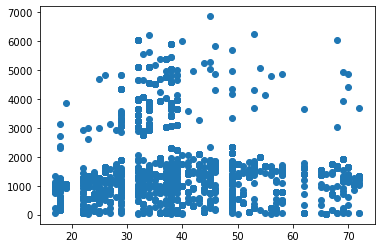

In [10]:
## use linear regression model to determine the linear relatinoships between loyalty points and age/ remuneration/ spending scores
# test relationship between age and loyalty points
# dependent variable 
y_age = reviews_clean["loyalty_points"]

#independent variable
X_age = reviews_clean["age"]

#check for linearity
plt.scatter(X_age,y_age)



In [11]:
# Run the OLS test.
f = 'y_age ~ X_age'
test = ols(f, data = reviews_clean).fit()

# View the output.
test.summary()

##only 0.2% of the variability in loyalty points can be explained by variances in age. 
## the f-stat probably is also much higher than the threshold of 0.05 meaning the regression is not good. 
#Therefore, age is not a good predictor of loyalty points

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_age   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0577
Time:                        14:12:31   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X_age         -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

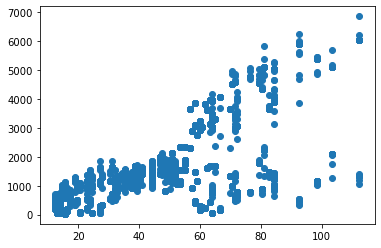

In [12]:
# test relationship between remuneration and loyalty points
# dependent variable 
y_rem = reviews_clean["loyalty_points"]

#independent variable
X_rem = reviews_clean["remuneration"]

#check for linearity
plt.scatter(X_rem,y_rem)


In [13]:
# Run the OLS test.
f_rem = 'y_rem ~ X_rem'
test_rem = ols(f_rem, data = reviews_clean).fit()

# View the output.
test_rem.summary()

##38% of the variability in loyalty points can be explained by variances in remuneration. 
## the f-stat probably is below than the threshold of 0.05 meaning the regression is statistically significant 
#Therefore, remuneration is a good predictor of loyalty points

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_rem   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        14:12:32   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X_rem         34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

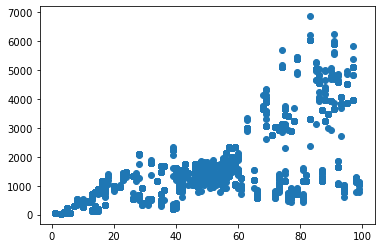

In [14]:
# test relationship between spending_score and loyalty points
# dependent variable 
y_spend = reviews_clean["loyalty_points"]

#independent variable
X_spend = reviews_clean["spending_score"]

#check for linearity
plt.scatter(X_spend,y_spend)


In [15]:
# Run the OLS test.
f_spend = 'y_spend ~ X_spend'
test_spend = ols(f_spend, data = reviews_clean).fit()

# View the output.
test_spend.summary()

##45% of the variability in loyalty points can be explained by variances in spending score
## the f-stat probably is below than the threshold of 0.05 meaning the regression is statistically significant 
#Therefore, spending score is a good predictor of loyalty points

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_spend   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        14:12:32   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X_spend       33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#week 1 assignment summary (150-200 words): 
#Running 3 independent tests to understand the relationship between loyalty points and age, remuneration and spending_score respectively.
# Age turns out to be a poor predictor as it has an insignficant regression with loyalty points
# Remuneration and spending score are rather good indicators of loyalty points with R^2 of 0.38 and 0.45 respectively
# As for next steps, I would want to look into the relationship between remuneration and spending score as their scatter plot against loyalty points is rather similar and logically, remuneration plays a direct role in one's spending power.

In [17]:
###WEEK 2

#create a dataframe with only remuneration and spending score columns
df2 = reviews_drop.drop(['gender','age', 'loyalty_points','education','product','review','summary'], axis = 1)
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [18]:
# Import the VIF package.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a VIF dataframe.
vif_data = pd.DataFrame()
vif_data['feature'] = df2.columns
  
# Calculate VIF for each feature.
vif_data['VIF'] = [variance_inflation_factor(df2.values, i)
                          for i in range(len(df2.columns))]

# View the output.
vif_data

,feature,VIF
0,remuneration,2.779416
1,spending_score,2.779416


In [19]:
#since the VIF of remuneration and spending score is < 10, there is no correlation between the two independent variables

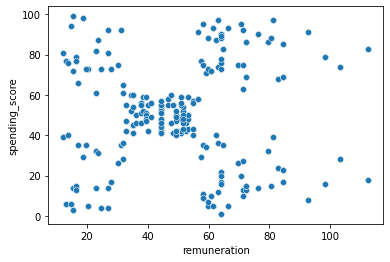

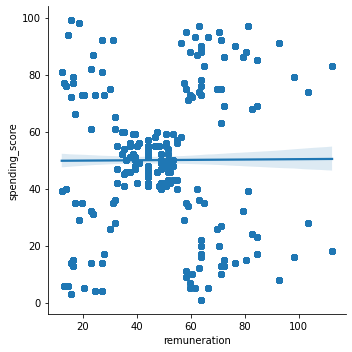

In [20]:
#create a scatterplot of remuneration against spending score
import seaborn as sns
sns.scatterplot(data=df2, x='remuneration', y='spending_score')

#add line of best fit
sns.lmplot(x='remuneration', y = 'spending_score', data = df2)

In [21]:
#detemine the correlation coefficient
from scipy import stats
stats.pearsonr(df2['remuneration'], df2['spending_score'])

##correlation coefficient is 0.00561 which means that there is a weak correlation with the very small correlation coefficient
#from https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html


(0.0056124919889756104, 0.8019352408418362)

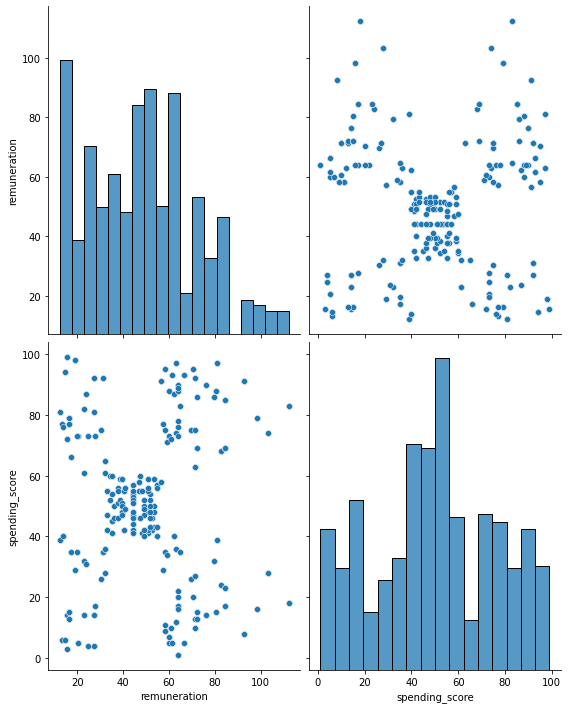

In [22]:
#create a pairplot of remuneration against spending score
g = sns.pairplot(data=df2, height = 5, aspect =0.8)


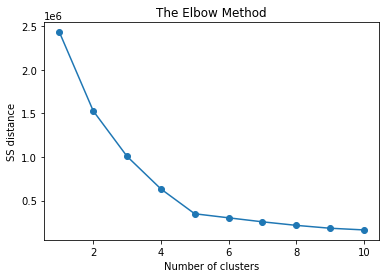

In [23]:
### apply the elbow method
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

###elbow method - k = 5

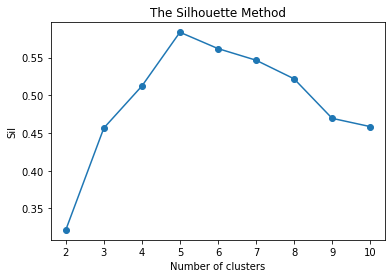

In [24]:
###silhouette method
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

###silhouette method - k=5

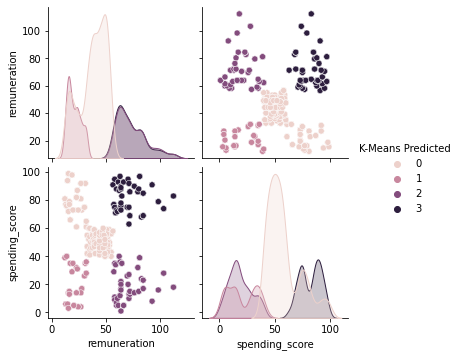

In [25]:
###Try k values of 4,5 and 6
# Use four clusters.
kmeans_4 = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans_4.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [26]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [27]:
# View the K-Means predicted.
print(df2.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  0
2         13.12               6                  1
3         13.12              77                  0
4         13.94              40                  1


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

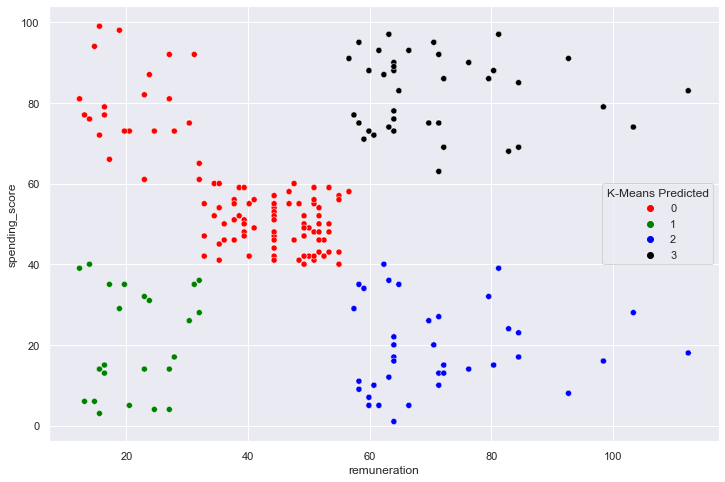

In [28]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data= df2,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

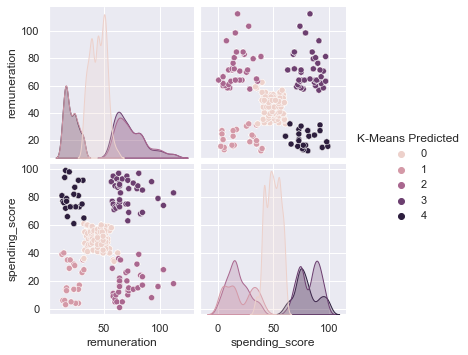

In [29]:
# Use five clusters.
kmeans_5 = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans_5.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [30]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [31]:
# View the K-Means predicted.
print(df2.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

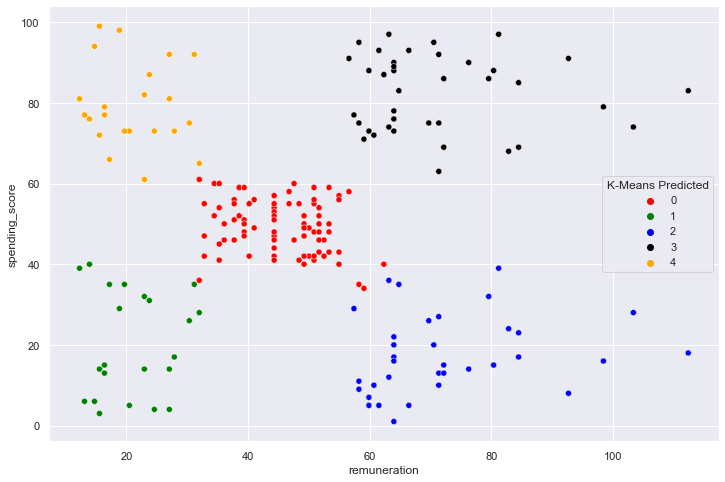

In [32]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

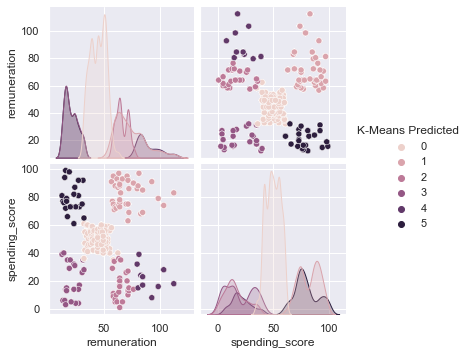

In [33]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [34]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

In [35]:
# View the K-Means predicted.
print(df2.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  5
2         13.12               6                  3
3         13.12              77                  5
4         13.94              40                  3


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

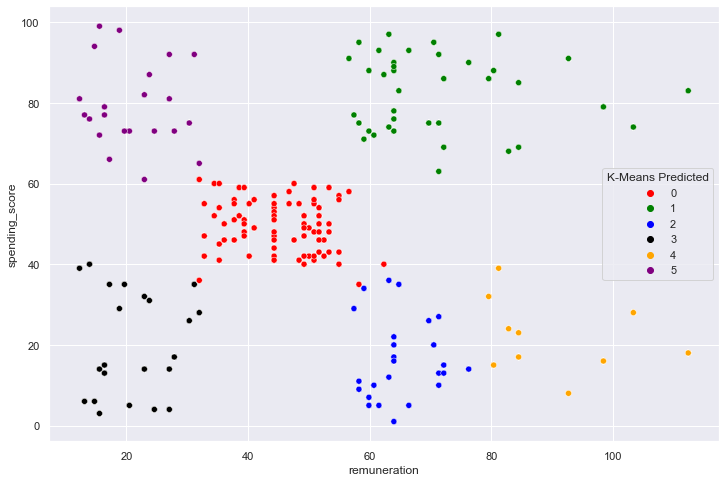

In [36]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange','purple'])

In [37]:
#week 3
#create dataframe with only summary and reviews column
reviews_summary = reviews_clean[['summary','review']]
reviews_summary

,summary,review
0,The fact that 50% of this space is wasted on a...,"When it comes to a DM's screen, the space on t..."
1,Another worthless Dungeon Master's screen from...,An Open Letter to GaleForce9*:\n\nYour unpaint...
2,"pretty, but also pretty useless","Nice art, nice printing. Why two panels are f..."
3,Five Stars,Amazing buy! Bought it as a gift for our new d...
4,Money trap,As my review of GF9's previous screens these w...
...,...,...
1995,The perfect word game for mixed ages (with Mom,The perfect word game for mixed ages (with Mom...
1996,Super fun,Great game. Did not think I would like it whe...
1997,Great Game,Great game for all.........\nKeeps the mind ni...
1998,Four Stars,fun game!


In [38]:
#import filter warnings
import warnings
warnings.filterwarnings('ignore')

#change all the words in the summary column to lower case
reviews_summary['summary'] = reviews_summary['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#preview the result
reviews_summary['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [39]:
# Remove punctuation.
reviews_summary['summary'] = reviews_summary['summary'].str.replace('[^\w\s]','')

# Preview the result.
reviews_summary.head()

,summary,review
0,the fact that 50 of this space is wasted on ar...,"When it comes to a DM's screen, the space on t..."
1,another worthless dungeon masters screen from ...,An Open Letter to GaleForce9*:\n\nYour unpaint...
2,pretty but also pretty useless,"Nice art, nice printing. Why two panels are f..."
3,five stars,Amazing buy! Bought it as a gift for our new d...
4,money trap,As my review of GF9's previous screens these w...


In [40]:
#change all the words in the summary column to lower case
reviews_summary['review'] = reviews_summary['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#preview the result
reviews_summary['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [41]:
# Remove punctuation.
reviews_summary['review'] = reviews_summary['review'].str.replace('[^\w\s]','')

# Preview the result.
reviews_summary.head()

,summary,review
0,the fact that 50 of this space is wasted on ar...,when it comes to a dms screen the space on the...
1,another worthless dungeon masters screen from ...,an open letter to galeforce9 your unpainted mi...
2,pretty but also pretty useless,nice art nice printing why two panels are fill...
3,five stars,amazing buy bought it as a gift for our new dm...
4,money trap,as my review of gf9s previous screens these we...


In [42]:
# Check the number of duplicate values in the summary column.
reviews_summary.duplicated().sum()

39

In [43]:
# Drop duplicates.
reviews_summary_clean = reviews_summary.drop_duplicates()

# Preview data.
reviews_summary_clean.reset_index()
reviews_summary_clean.head()

,summary,review
0,the fact that 50 of this space is wasted on ar...,when it comes to a dms screen the space on the...
1,another worthless dungeon masters screen from ...,an open letter to galeforce9 your unpainted mi...
2,pretty but also pretty useless,nice art nice printing why two panels are fill...
3,five stars,amazing buy bought it as a gift for our new dm...
4,money trap,as my review of gf9s previous screens these we...


In [44]:
# View the shape of the data.
reviews_summary_clean.shape

(1961, 2)

In [45]:
reviews_summary_clean

,summary,review
0,the fact that 50 of this space is wasted on ar...,when it comes to a dms screen the space on the...
1,another worthless dungeon masters screen from ...,an open letter to galeforce9 your unpainted mi...
2,pretty but also pretty useless,nice art nice printing why two panels are fill...
3,five stars,amazing buy bought it as a gift for our new dm...
4,money trap,as my review of gf9s previous screens these we...
...,...,...
1995,the perfect word game for mixed ages with mom,the perfect word game for mixed ages with mom ...
1996,super fun,great game did not think i would like it when ...
1997,great game,great game for all keeps the mind nimble
1998,four stars,fun game


In [46]:
# Determine values of output.
df1_reviews = reviews_summary_clean['review'].values

# View results.
df1_reviews

array(['when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely',
       'an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland

In [47]:
# Determine values of output.
df1_summary = reviews_summary_clean['summary'].values

# View results.
df1_summary

array(['the fact that 50 of this space is wasted on art and not terribly informative or needed art ',
       'another worthless dungeon masters screen from galeforce9',
       'pretty but also pretty useless', ..., 'great game', 'four stars',
       'love this game'], dtype=object)

In [48]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adeli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
# Tokenise the words.
reviews_summary_clean['tokens_summary'] = reviews_summary_clean['summary'].apply(word_tokenize)

# Preview data.
reviews_summary_clean['tokens_summary'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens_summary, dtype: object

In [50]:
# Tokenise the words.
reviews_summary_clean['tokens_review'] = reviews_summary_clean['review'].apply(word_tokenize)

# Preview data.
reviews_summary_clean['tokens_review'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens_review, dtype: object

In [51]:
reviews_summary_clean = reviews_summary_clean.reset_index()

In [52]:
reviews_summary_clean

,index,summary,review,tokens_summary,tokens_review
0,0,the fact that 50 of this space is wasted on ar...,when it comes to a dms screen the space on the...,"[the, fact, that, 50, of, this, space, is, was...","[when, it, comes, to, a, dms, screen, the, spa..."
1,1,another worthless dungeon masters screen from ...,an open letter to galeforce9 your unpainted mi...,"[another, worthless, dungeon, masters, screen,...","[an, open, letter, to, galeforce9, your, unpai..."
2,2,pretty but also pretty useless,nice art nice printing why two panels are fill...,"[pretty, but, also, pretty, useless]","[nice, art, nice, printing, why, two, panels, ..."
3,3,five stars,amazing buy bought it as a gift for our new dm...,"[five, stars]","[amazing, buy, bought, it, as, a, gift, for, o..."
4,4,money trap,as my review of gf9s previous screens these we...,"[money, trap]","[as, my, review, of, gf9s, previous, screens, ..."
...,...,...,...,...,...
1956,1995,the perfect word game for mixed ages with mom,the perfect word game for mixed ages with mom ...,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w..."
1957,1996,super fun,great game did not think i would like it when ...,"[super, fun]","[great, game, did, not, think, i, would, like,..."
1958,1997,great game,great game for all keeps the mind nimble,"[great, game]","[great, game, for, all, keeps, the, mind, nimble]"
1959,1998,four stars,fun game,"[four, stars]","[fun, game]"


In [53]:
# Define an empty list of tokens.
tokens_review_list = []

for i in range(reviews_summary_clean.shape[0]):
    # Add each token to the list.
   tokens_review_list= tokens_review_list + reviews_summary_clean['tokens_review'][i]

In [54]:
# Define an empty list of tokens.
tokens_summary_list = []

for i in range(reviews_summary_clean.shape[0]):
    # Add each token to the list.
   tokens_summary_list= tokens_summary_list + reviews_summary_clean['tokens_summary'][i]

In [55]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist_review = FreqDist('token_review_list')

# Preview data.
fdist_review

FreqDist({'e': 3, 't': 2, '_': 2, 'i': 2, 'o': 1, 'k': 1, 'n': 1, 'r': 1, 'v': 1, 'w': 1, ...})

In [56]:
# Calculate the frequency distribution.
fdist_summary = FreqDist('token_summary_list')

# Preview data.
fdist_summary

FreqDist({'t': 2, '_': 2, 's': 2, 'm': 2, 'o': 1, 'k': 1, 'e': 1, 'n': 1, 'u': 1, 'a': 1, ...})

In [57]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens_review_list_clean = [word for word in tokens_review_list if word.isalnum()]
tokens_review_list_clean

['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [58]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens_summary_list_clean = [word for word in tokens_summary_list if word.isalnum()]
tokens_summary_list_clean

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

In [59]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist_review_clean = FreqDist('token_review_list_clean')

# Preview data.
fdist_review_clean

FreqDist({'e': 4, '_': 3, 't': 2, 'n': 2, 'i': 2, 'l': 2, 'o': 1, 'k': 1, 'r': 1, 'v': 1, ...})

In [60]:
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2_review = [x for x in tokens_review_list_clean if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_review_string = ''

for value in tokens_review_list_clean:
    # Add each filtered token word to the string.
    tokens2_review_string = tokens2_review_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adeli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
# Create a filtered list of tokens without stop words.
tokens2_summary = [x for x in tokens_summary_list_clean if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_summary_string = ''

for value in tokens_review_list_clean:
    # Add each filtered token word to the string.
    tokens2_summary_string = tokens2_summary_string + value + ' '

In [62]:
tokens2_review_string

'when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could 

In [63]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

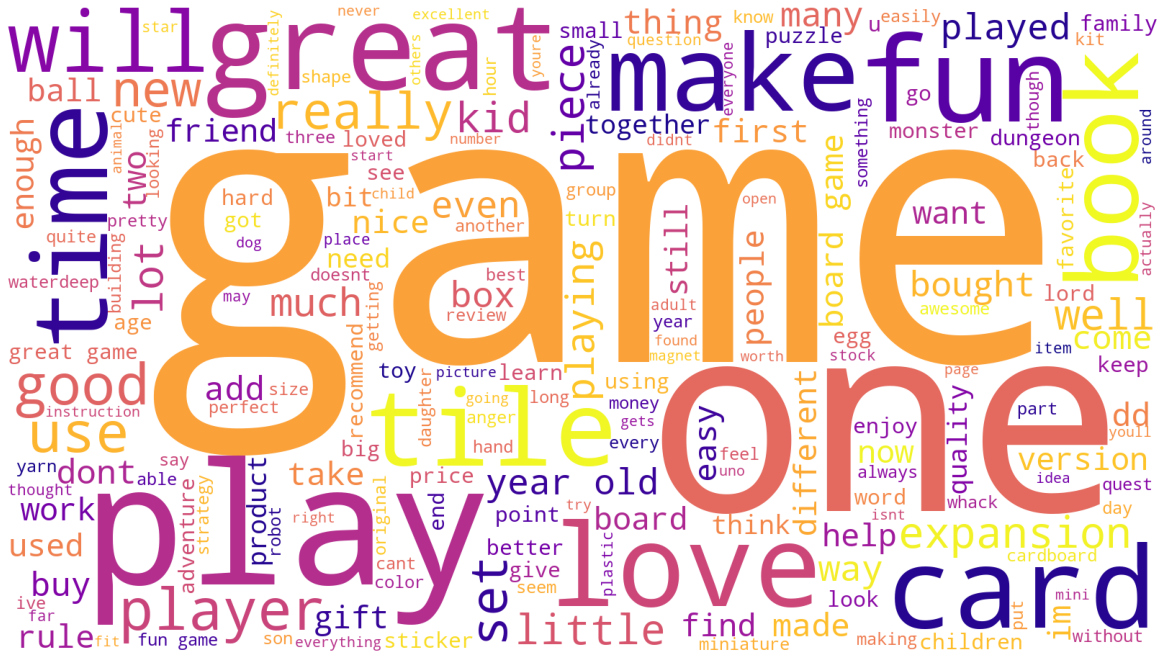

In [64]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_review_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly to the one provided.

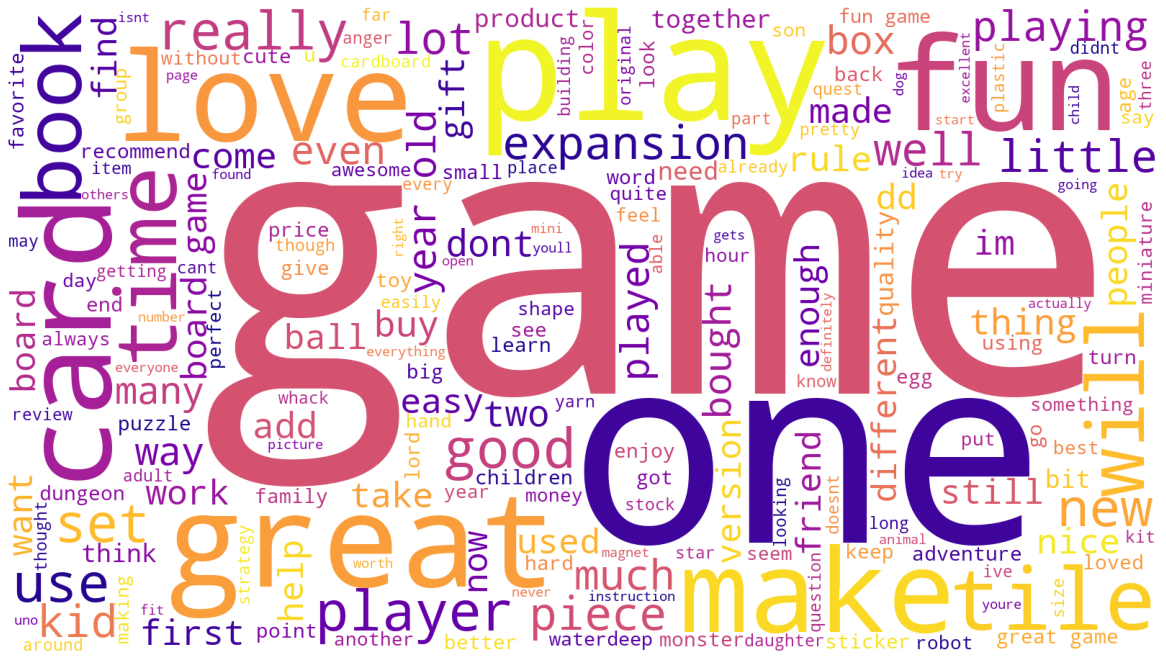

In [65]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_summary_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly to the one provided.

In [66]:
# View the frequency distribution.
fdist_review = FreqDist(tokens2_review)

# Preview the data.
fdist_review

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [67]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(tokens2_review).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review.head(15)

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


In [68]:
# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(tokens2_summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary.head(15)

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


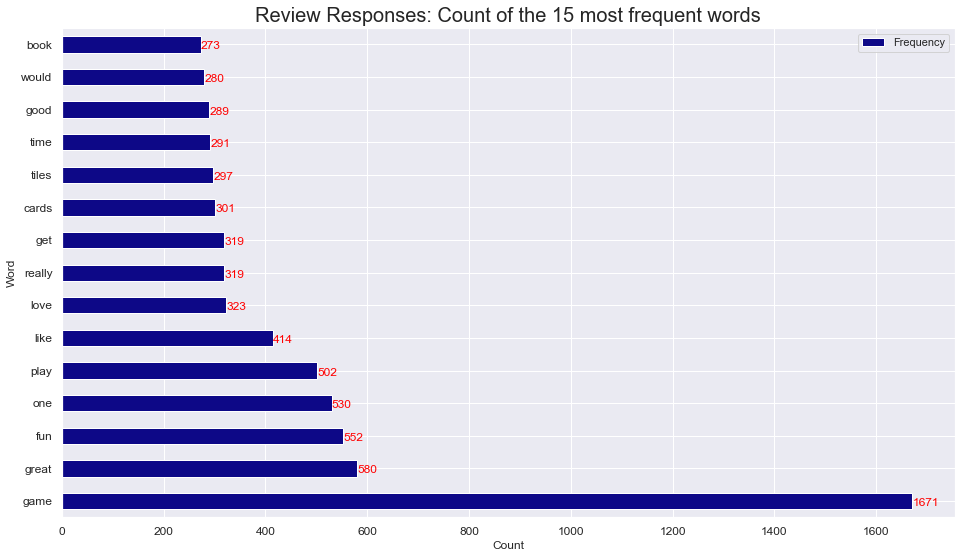

In [69]:
# Set the plot type.
ax = counts_review.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Review Responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

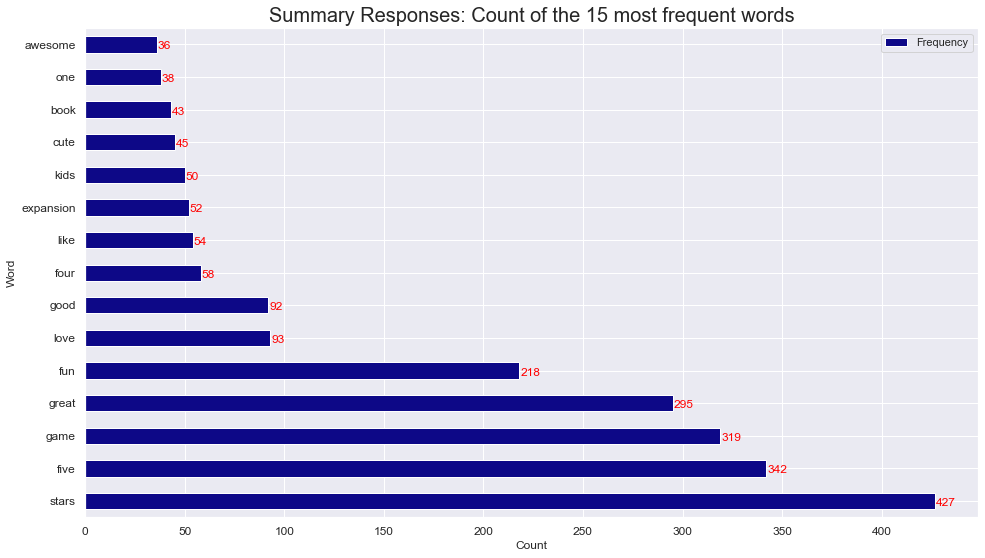

In [70]:
# Set the plot type.
ax = counts_summary.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Summary Responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [71]:
# Split up each tweet into individual words
df2_reviews = [word_tokenize(_) for _ in df1_reviews]

# View results.
df2_reviews

[['when',
  'it',
  'comes',
  'to',
  'a',
  'dms',
  'screen',
  'the',
  'space',
  'on',
  'the',
  'screen',
  'itself',
  'is',
  'at',
  'an',
  'absolute',
  'premium',
  'the',
  'fact',
  'that',
  '50',
  'of',
  'this',
  'space',
  'is',
  'wasted',
  'on',
  'art',
  'and',
  'not',
  'terribly',
  'informative',
  'or',
  'needed',
  'art',
  'as',
  'well',
  'makes',
  'it',
  'completely',
  'useless',
  'the',
  'only',
  'reason',
  'that',
  'i',
  'gave',
  'it',
  '2',
  'stars',
  'and',
  'not',
  '1',
  'was',
  'that',
  'technically',
  'speaking',
  'it',
  'can',
  'at',
  'least',
  'still',
  'stand',
  'up',
  'to',
  'block',
  'your',
  'notes',
  'and',
  'dice',
  'rolls',
  'other',
  'than',
  'that',
  'it',
  'drops',
  'the',
  'ball',
  'completely'],
 ['an',
  'open',
  'letter',
  'to',
  'galeforce9',
  'your',
  'unpainted',
  'miniatures',
  'are',
  'very',
  'not',
  'bad',
  'your',
  'spell',
  'cards',
  'are',
  'great',
  'your',
 

In [72]:
# Split up each tweet into individual words
df2_summary = [word_tokenize(_) for _ in df1_summary]

# View results.
df2_summary

[['the',
  'fact',
  'that',
  '50',
  'of',
  'this',
  'space',
  'is',
  'wasted',
  'on',
  'art',
  'and',
  'not',
  'terribly',
  'informative',
  'or',
  'needed',
  'art'],
 ['another',
  'worthless',
  'dungeon',
  'masters',
  'screen',
  'from',
  'galeforce9'],
 ['pretty', 'but', 'also', 'pretty', 'useless'],
 ['five', 'stars'],
 ['money', 'trap'],
 ['five', 'stars'],
 ['best', 'gm', 'screen', 'ever'],
 ['five', 'stars'],
 ['great', 'but', 'could', 'be', 'even', 'better'],
 ['another',
  'missed',
  'opportunity',
  'not',
  'a',
  'value',
  'add',
  'to',
  'the',
  'product',
  'line'],
 ['five', 'stars'],
 ['love', 'the', 'map'],
 ['not', 'a', 'general', 'dm', 'screen'],
 ['very', 'weak', 'game'],
 ['fell', 'completely', 'flat'],
 ['five', 'stars'],
 ['good', 'book'],
 ['buckley', 'was', 'a', 'card', 'mommer'],
 ['very', 'advanced', 'but', 'as', 'good', 'as', 'it', 'gets'],
 ['you', 'better', 'know', 'what', 'youre', 'getting', 'into'],
 ['dont', 'bother'],
 ['the', 'w

In [73]:
# Some pre-processing:
#-- lets get every word
#-- lets convert it to lowercase
#-- only include if the word is alphanumeric and if it is in the list of English words.

df3_reviews = [[y.lower() for y in x if y.lower() not in english_stopwords and y.isalpha()] for x in df2_reviews]

In [74]:
# Some pre-processing:
#-- lets get every word
#-- lets convert it to lowercase
#-- only include if the word is alphanumeric and if it is in the list of English words.

df3_summary = [[y.lower() for y in x if y.lower() not in english_stopwords and y.isalpha()] for x in df2_summary]

In [75]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adeli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [76]:
# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()

In [77]:
# Run through a dictionary comprehension to take every cleaned tweet 
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_reviews_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df3_reviews}

In [78]:
# Run through a dictionary comprehension to take every cleaned tweet 
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_summary_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df3_summary}

In [79]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity_reviews = pd.DataFrame(df_reviews_polarity).T

# View the DataFrame.
polarity_reviews

,neg,neu,pos,compound
comes dms screen space screen absolute premium fact space wasted art terribly informative needed art well makes completely useless reason gave stars technically speaking least still stand block notes dice rolls drops ball completely,0.291,0.661,0.048,-0.8932
open letter unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible im still waiting single screen isnt polluted pointless artwork useful referenceable tables youve created single use screen useful running storm kings thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nighuseless short stop making crap dm screens,0.186,0.537,0.276,0.8434
nice art nice printing two panels filled general forgotten realms map beyond one blue ocean waste dont understand cant make dm screens useful kinds adventures rather solely specific adventure youre supposed able transpose adventure lands outside forgotten realms even list new monsters npcs would least useful map even would stuff related running game broaduse stuff related giants thing curse strahd make useful raven loft undead horror campaigns general instead huge amount screen space solely mapping castle ravenloft useful small fraction time even curse strahd adventure let alone various ravenloft adventuring really kill extended use screens thinking potential use adventure question well use broader sense rage demons screen far useful broad dark adventuring covering lot rules various conditions may suffer map one panel storm giants one decent tables includes really misses mark maybe ask dms would use,0.181,0.588,0.230,0.7281
amazing buy bought gift new dm perfect,0.000,0.278,0.722,0.8860
review previous screens completely unnecessary nearly useless skip definition waste money,0.394,0.606,0.000,-0.7063
...,...,...,...,...
retired find great way stay alert spelling vocabulary also need use math keep score great game brain,0.000,0.574,0.426,0.8860
perfect word game mixed ages mom perhaps giving little help yr old ages love,0.000,0.440,0.560,0.9137
great game think would like first received turned lot fun play regularly order extra set always travel stuff,0.000,0.532,0.468,0.9062
great game keeps mind nimble,0.000,0.494,0.506,0.6249


In [80]:
polarity_reviews_reindex =polarity_reviews.reset_index()
polarity_reviews_reindex

,index,neg,neu,pos,compound
0,comes dms screen space screen absolute premium...,0.291,0.661,0.048,-0.8932
1,open letter unpainted miniatures bad spell car...,0.186,0.537,0.276,0.8434
2,nice art nice printing two panels filled gener...,0.181,0.588,0.230,0.7281
3,amazing buy bought gift new dm perfect,0.000,0.278,0.722,0.8860
4,review previous screens completely unnecessary...,0.394,0.606,0.000,-0.7063
...,...,...,...,...,...
1922,retired find great way stay alert spelling voc...,0.000,0.574,0.426,0.8860
1923,perfect word game mixed ages mom perhaps givin...,0.000,0.440,0.560,0.9137
1924,great game think would like first received tur...,0.000,0.532,0.468,0.9062
1925,great game keeps mind nimble,0.000,0.494,0.506,0.6249


In [81]:
polarity_reviews_bottom20 = polarity_reviews_reindex.sort_values(by='compound').head(20)
polarity_reviews_bottom20

,index,neg,neu,pos,compound
358,found card game opposite intended actually kid...,0.326,0.505,0.168,-0.9264
1122,dig shame years ago wasnt running rpgs probabl...,0.259,0.676,0.065,-0.9195
1511,one ring innovative rpg set middle earth time ...,0.181,0.662,0.157,-0.8966
0,comes dms screen space screen absolute premium...,0.291,0.661,0.048,-0.8932
863,crappy cardboard ghost original hard believe s...,0.723,0.157,0.120,-0.8885
1746,ball whacks valuable tool distraction refocusi...,0.319,0.438,0.243,-0.8807
417,uno questions anger okay way discuss anger get...,0.491,0.427,0.081,-0.8625
279,bought thinking would really fun disappointed ...,0.455,0.427,0.118,-0.8513
342,yearold granddaughter frustrated discouraged a...,0.520,0.359,0.121,-0.8360
1742,im high school math teacher cant keep ball wha...,0.201,0.660,0.139,-0.8028


In [82]:
polarity_reviews_top20 = polarity_reviews_reindex.sort_values(by='compound', ascending = False).head(20)
polarity_reviews_top20

,index,neg,neu,pos,compound
860,whenever see game shelf get disturbing visual ...,0.021,0.785,0.193,0.9992
1096,disclaimer bought local store paid list value ...,0.042,0.681,0.276,0.9992
353,kit awesome old daughter made chihuahua dog fi...,0.029,0.604,0.367,0.9988
1078,middle aged married guy loves sci fi video gam...,0.099,0.641,0.260,0.9985
1616,employ one creativityenhancing resource rest l...,0.059,0.711,0.230,0.9985
1522,dad two boys im always lookout activities us t...,0.043,0.702,0.255,0.9979
1264,lords waterdeep awesome scoundrels skullport m...,0.090,0.697,0.213,0.9977
1322,lords waterdeep scoundrels skullport expansion...,0.037,0.713,0.251,0.9975
1038,fan dungeons dragons adventureexploration game...,0.076,0.632,0.292,0.9971
817,dont know ive ever taken delight realizing til...,0.105,0.661,0.235,0.9969


In [83]:
top15words_review_resetindex = counts_review.reset_index()
top15words_review = top15words_review_resetindex.drop(columns = 'Frequency')
top15words_review

,Word
0,game
1,great
2,fun
3,one
4,play
5,like
6,love
7,really
8,get
9,cards


In [84]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity_summary = pd.DataFrame(df_summary_polarity).T

# View the DataFrame.
polarity_summary

,neg,neu,pos,compound
fact space wasted art terribly informative needed art,0.531,0.469,0.000,-0.7783
another worthless dungeon masters screen,0.420,0.580,0.000,-0.4404
pretty also pretty useless,0.275,0.098,0.627,0.5574
five stars,0.000,1.000,0.000,0.0000
money trap,0.697,0.303,0.000,-0.3182
...,...,...,...,...
fun card game people like words,0.000,0.408,0.592,0.7003
sort card game equivalent scrabble lot easier,0.000,0.682,0.318,0.4215
great game keep mind active,0.000,0.306,0.694,0.7783
great mind game,0.000,0.328,0.672,0.6249


In [85]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity_summary = pd.DataFrame(df_summary_polarity).T

# View the DataFrame.
bottom20_summary = polarity_summary.sort_values(by=['compound'], ascending = True)
bottom20_summary.head(20)

,neg,neu,pos,compound
crappy cardboard ghost original hard believe shame hasbro disgusting,0.723,0.157,0.12,-0.8885
fact space wasted art terribly informative needed art,0.531,0.469,0.00,-0.7783
tardis doctor river song amy rory fight every enemy cards,0.433,0.567,0.00,-0.7269
defective poor qc,0.857,0.143,0.00,-0.7184
find board game dumb boring,0.651,0.349,0.00,-0.6808
bad set limited applicability,0.730,0.270,0.00,-0.6597
hated running rpg campaign dealing towns,0.457,0.543,0.00,-0.6369
worst quality adult board game ive even seen,0.369,0.631,0.00,-0.6249
sided die,0.796,0.204,0.00,-0.5994
anger control game,0.649,0.351,0.00,-0.5719


In [86]:
# View the DataFrame.
top20_summary = polarity_summary.sort_values(by=['compound'], ascending = False)
top20_summary.head(20)

,neg,neu,pos,compound
wow great set tiles great price great starter set,0.0,0.237,0.763,0.9524
wrath ashardalon great investment avid rpg fan enjoys tabletop well crpgs,0.0,0.300,0.700,0.9186
great playing great creative workshops,0.0,0.072,0.928,0.9169
easy learn great fun play,0.0,0.073,0.927,0.9136
loves stickers loves peppa perfect,0.0,0.153,0.847,0.9022
great quality cute perfect toddler,0.0,0.156,0.844,0.8957
easy fun fast thoroughly enjoyable adults well kids age eight,0.0,0.338,0.662,0.8947
great game value price great also,0.0,0.221,0.779,0.8910
great game great value,0.0,0.086,0.914,0.8910
wish buy better luck fairly easy understand plenty,0.0,0.258,0.742,0.8885
